<a href="https://colab.research.google.com/github/miguelangel18241/Probabilities/blob/main/Inventory_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

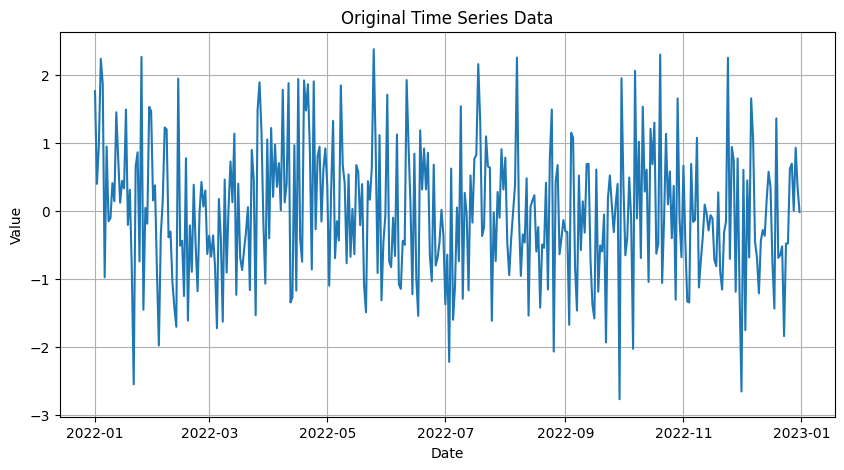

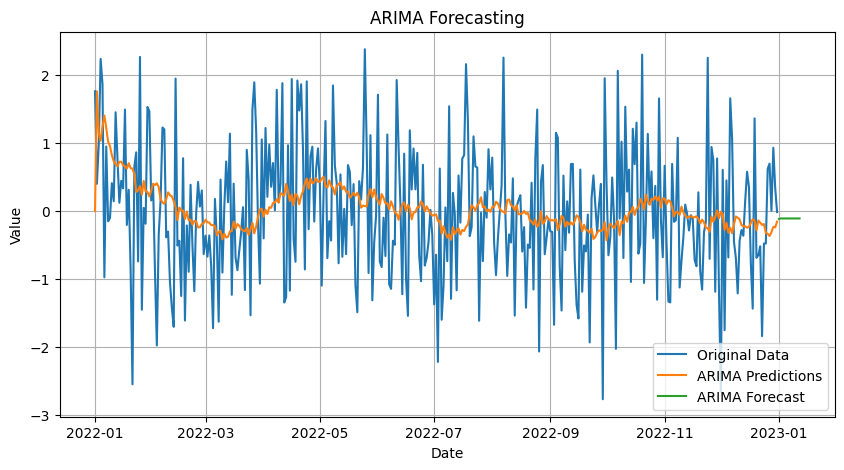

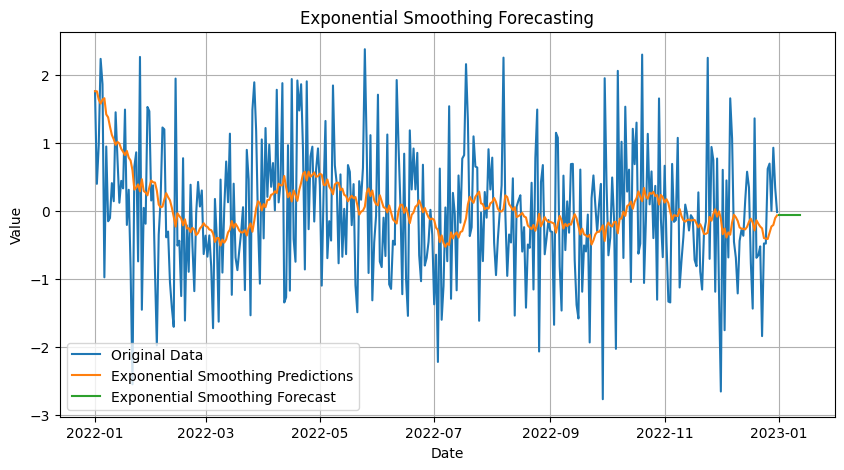

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Generating sample time series data
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
data = np.random.normal(loc=0, scale=1, size=len(dates))
ts = pd.Series(data, index=dates)

# Plotting the original time series data
plt.figure(figsize=(10, 5))
plt.plot(ts)
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Implementing ARIMA
model_arima = ARIMA(ts, order=(1, 1, 1))  # Example parameters (p, d, q)
result_arima = model_arima.fit()
forecast_arima = result_arima.forecast(steps=12)  # Forecasting 12 steps ahead

# Plotting ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(ts, label='Original Data')
plt.plot(result_arima.predict(), label='ARIMA Predictions')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Implementing exponential smoothing
model_exp_smoothing = SimpleExpSmoothing(ts)
result_exp_smoothing = model_exp_smoothing.fit()
forecast_exp_smoothing = result_exp_smoothing.forecast(steps=12)  # Forecasting 12 steps ahead

# Plotting exponential smoothing forecast
plt.figure(figsize=(10, 5))
plt.plot(ts, label='Original Data')
plt.plot(result_exp_smoothing.fittedvalues, label='Exponential Smoothing Predictions')
plt.plot(forecast_exp_smoothing, label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


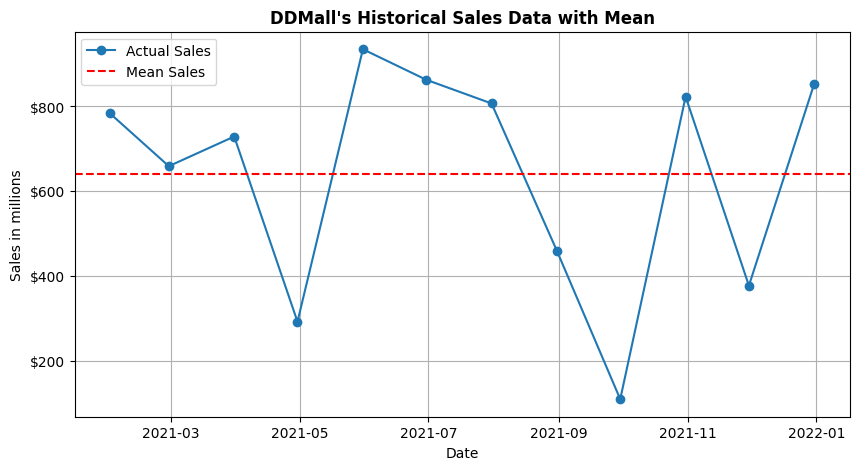

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from statsmodels.tsa.arima.model import ARIMA

# Generating sample historical sales data
np.random.seed(0)
dates = pd.date_range(start='2021-01-01', end='2021-12-31', freq='M')
sales_data = np.random.randint(low=100, high=1000, size=len(dates))
sales_df = pd.DataFrame({'Date': dates, 'Sales': sales_data})

# Generating external factors: month and trend
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Trend'] = range(1, len(sales_df) + 1)

# Calculate mean sales for each month
mean_sales_monthly = sales_df.groupby('Month')['Sales'].mean()

# Plotting historical sales data and mean
plt.figure(figsize=(10, 5))
plt.plot(sales_df['Date'], sales_df['Sales'], marker='o', linestyle='-', label='Actual Sales')
plt.axhline(y=mean_sales_monthly.mean(), color='red', linestyle='--', label='Mean Sales')
plt.title("DDMall's Historical Sales Data with Mean", fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Sales in millions')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))  # Formatting y-axis ticks with currency symbol
plt.legend()
plt.grid(True)
plt.show()
